# Banking Persoanl Loan Modelling


## <span style='color:green'> Importing required libraries </span>

In [177]:
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
desc = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Description')

In [179]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [79]:
description = desc.iloc[6:20,1:].replace(np.nan, '', regex=True) 
description = description.reset_index(drop=True)

,Unnamed: 1,Unnamed: 2
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan off...


# <span style='color:green'> Data Visualization </span>

<AxesSubplot:>

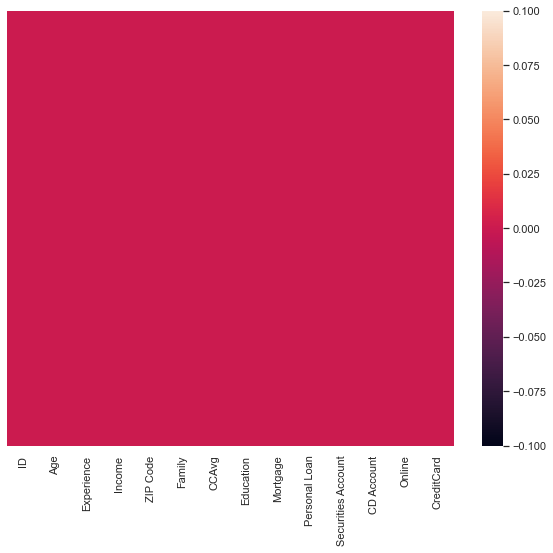

In [55]:
sns.heatmap(df.isnull(), yticklabels=False)

In [39]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Count plot of Personal Loan')

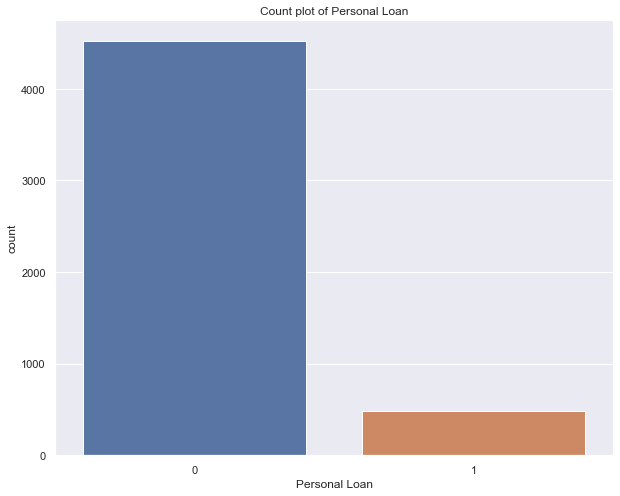

In [184]:
sns.countplot(x='Personal Loan', data=df)
plt.title('Count plot of Personal Loan')

In [215]:
df[["CCAvg"]].iplot(kind="histogram", bins=40, theme="white", title="Customer's Credit cared average spending",
         xTitle='CCAvg', yTitle='Count')

Text(0.5, 1.0, 'Count of Personal Loan with people having Certificate of Deposite')

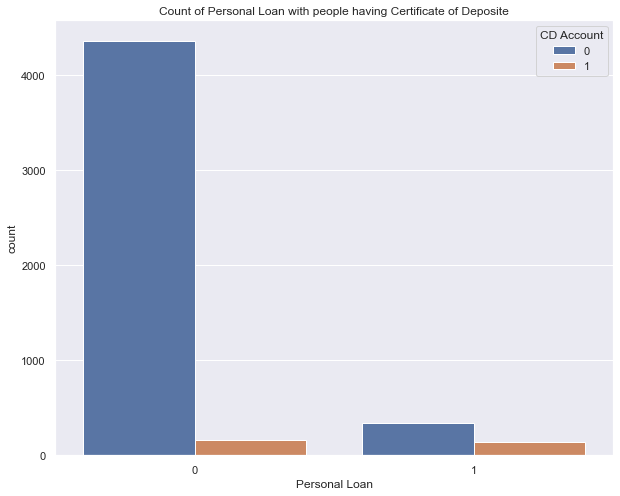

In [216]:
sns.countplot(x='Personal Loan', data=df, hue='CD Account')
plt.title('Count of Personal Loan with people having Certificate of Deposite')

In [218]:
df['Income'].iplot(kind='box', title='Income of all customers in 1000s')
#sns.countplot(x='Personal Loan', data=df, hue='Family')
#plt.title('Count of people bought personal loan and with their family size')

## <span style='color:green'>Modelling</span>

In [144]:
X = df.drop(['Personal Loan', 'ZIP Code', 'ID'], axis=1)
y = df['Personal Loan']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=49)
#X, y = make_classification(random_state=49)

In [146]:
logR=LogisticRegression(max_iter=1000)

In [147]:
logR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [148]:

predictions = logR.predict(X_test)

In [178]:
#This code is used to avoid the iterations limit warning: "ConvergenceWarning: lbfgs failed to converge (status=1)" 
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(X_train, y_train)
#pipe.score(X_test, y_test)

### The below graph shows the confusion Matrix

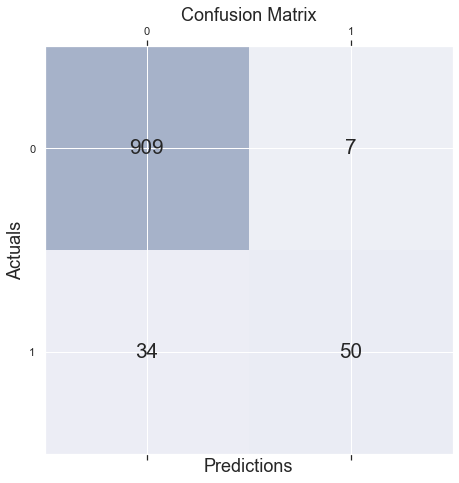

In [176]:
conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### The bolow code shows the accuracy scores of the model

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       916
           1       0.88      0.60      0.71        84

    accuracy                           0.96      1000
   macro avg       0.92      0.79      0.84      1000
weighted avg       0.96      0.96      0.96      1000



### The following code shows the top three most important features that effect Persoanl Loan (method = Spearman corr.)
- Income has an impact on Personal Loan more than 42%
- Average spending on credit cards has an impact on Personal Loan more than 30%
- CD Account has an impact on Personal Loan more than 30%


In [174]:
data = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
corr = data.corr(method='spearman')
corr['Personal Loan']

Age                  -0.008151
Experience           -0.007905
Income                0.430739
Family                0.061757
CCAvg                 0.313957
Education             0.139492
Mortgage              0.063294
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

### The following code shows the top three most important features that effect Persoanl Loan (method = Pearson corr.)
- Income has an impact on Personal Loan more than 50%
- Average spending on credit cards has an impact on Personal Loan more than 35%
- CD Account has an impact on Personal Loan more than 30%

In [168]:
data[data.columns[1:]].corr()['Personal Loan'][:]

Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64